In [4]:
import pandas as pd
crimes = pd.read_csv('http://cluster.earlham.edu/~apc0013/Chicago_crime.csv')

In [3]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,...,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,...,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,...,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,...,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [3]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
crimes.shape

(6836023, 22)

In [5]:
crimes['Location Description'].value_counts()[:10]

STREET                            1789524
RESIDENCE                         1158003
APARTMENT                          710066
SIDEWALK                           671188
OTHER                              260162
PARKING LOT/GARAGE(NON.RESID.)     196223
ALLEY                              152308
SCHOOL, PUBLIC, BUILDING           143715
RESIDENCE-GARAGE                   132578
SMALL RETAIL STORE                 121687
Name: Location Description, dtype: int64

 ### Graphs 
 
 #### Graph 1 : %crimes by location description (10 most common locations) 
 #### Graph 2 : %crimes by crime type (10 most common crime types) 
 #### Graph 3 : %crimes by Description 
 #### Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes

Text(0, 0.5, 'Percentage of Crimes')

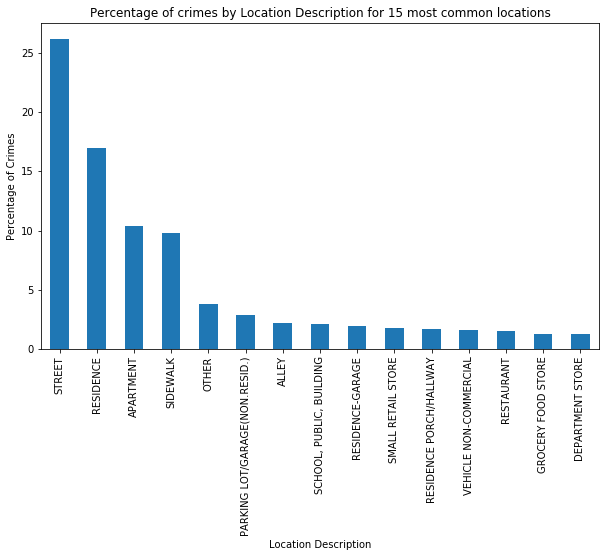

In [35]:
# Graph 1 : %crimes by location description (10 most common locations) 

import matplotlib.pyplot as plt
%matplotlib inline
percent = crimes['Location Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Location Description for 15 most common locations') 
ax.set_xlabel('Location Description')
ax.set_ylabel('Percentage of Crimes')


Text(0, 0.5, 'Percentage of Crimes')

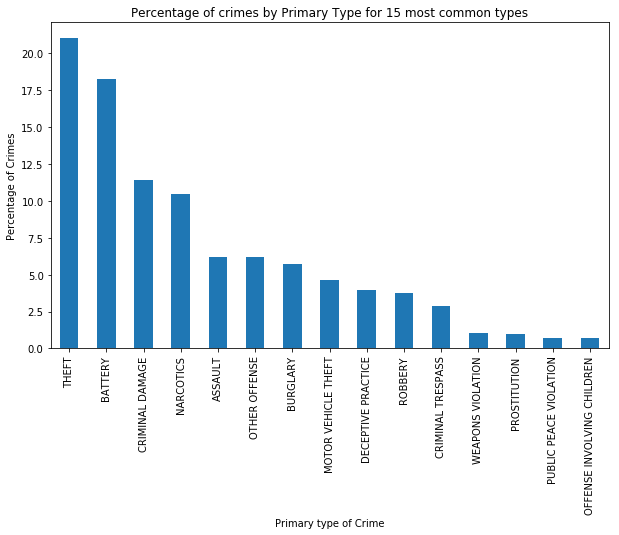

In [7]:
# Graph 2 : %crimes by crime type (10 most common crime types) 
percent = crimes['Primary Type'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Primary Type for 15 most common types') 
ax.set_xlabel('Primary type of Crime')
ax.set_ylabel('Percentage of Crimes')

Text(0, 0.5, 'Percentage of Crimes')

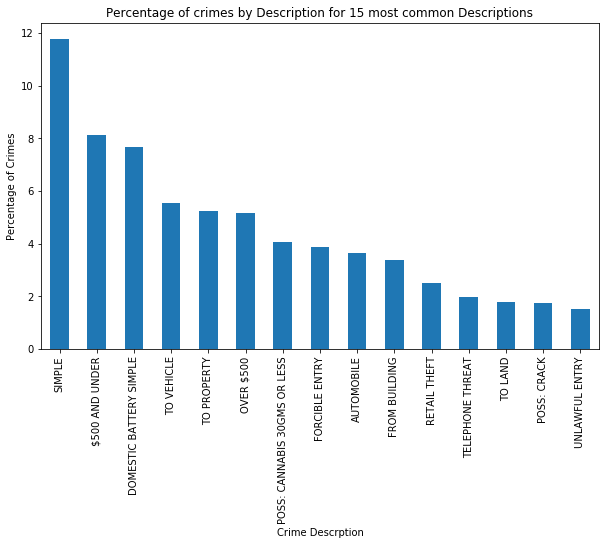

In [65]:
# Graph 3 : %crimes by Description 

percent = crimes['Description'].value_counts(normalize=True).apply(lambda x: 100*x)[:15]
fig = plt.figure(figsize=(10,6)) 
ax = fig.gca()     
percent.plot.bar(ax = ax) 
ax.set_title('Percentage of crimes by Description for 15 most common Descriptions') 
ax.set_xlabel('Crime Descrption')
ax.set_ylabel('Percentage of Crimes')

In [7]:
import numpy as np
location_by_type  = crimes.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [11]:
location_by_type

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,DOMESTIC VIOLENCE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,216.0,70.0,361.0,1844.0,1.0,389.0,1027.0,1636.0,83.0,0.0,...,460.0,17.0,1.0,106.0,0.0,149.0,51.0,0.0,1501.0,221.0
AIRCRAFT,0.0,30.0,118.0,0.0,0.0,0.0,8.0,2.0,19.0,0.0,...,29.0,0.0,0.0,96.0,0.0,0.0,10.0,0.0,321.0,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,0.0,42.0,53.0,0.0,3.0,0.0,30.0,65.0,143.0,0.0,...,30.0,0.0,0.0,10.0,0.0,3.0,2.0,0.0,405.0,1.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,16.0,42.0,0.0,6.0,1.0,16.0,2.0,29.0,0.0,...,36.0,0.0,0.0,9.0,0.0,0.0,2.0,0.0,374.0,5.0
AIRPORT EXTERIOR - NON-SECURE AREA,1.0,44.0,114.0,2.0,1.0,0.0,65.0,50.0,164.0,0.0,...,28.0,0.0,0.0,18.0,0.0,2.0,0.0,0.0,185.0,3.0
AIRPORT EXTERIOR - SECURE AREA,0.0,22.0,29.0,1.0,2.0,0.0,25.0,20.0,9.0,0.0,...,12.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0,136.0,0.0
AIRPORT PARKING LOT,0.0,35.0,45.0,0.0,1.0,0.0,152.0,31.0,56.0,0.0,...,19.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,271.0,0.0
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,0.0,69.0,121.0,1.0,1.0,0.0,29.0,761.0,62.0,0.0,...,31.0,0.0,0.0,3.0,0.0,1.0,3.0,1.0,549.0,0.0
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,0.0,17.0,28.0,1.0,2.0,0.0,19.0,7.0,22.0,0.0,...,40.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,451.0,1.0


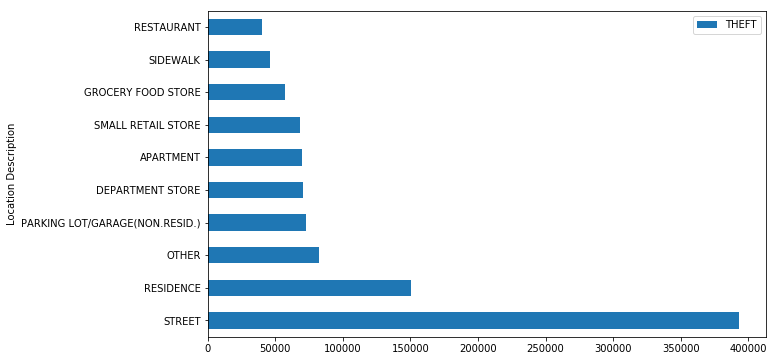

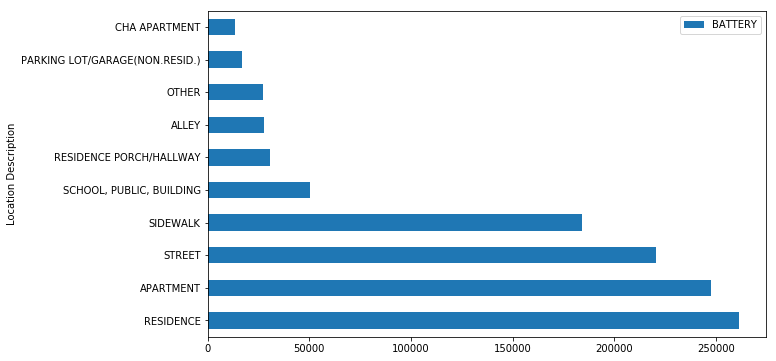

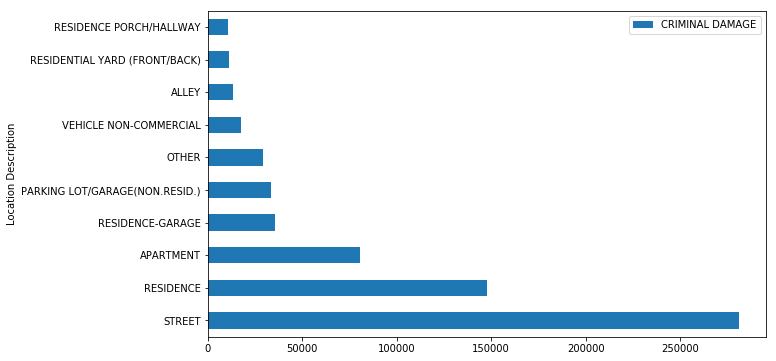

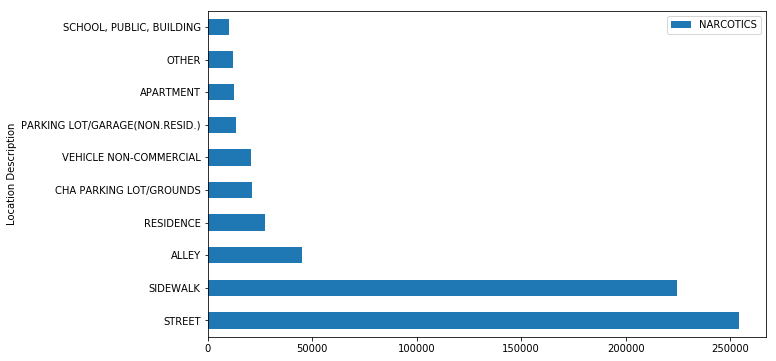

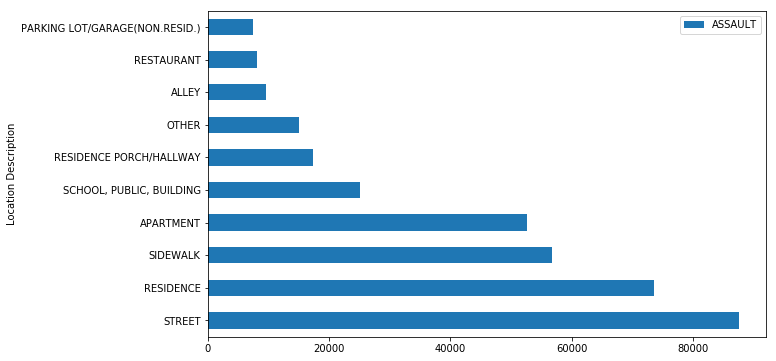

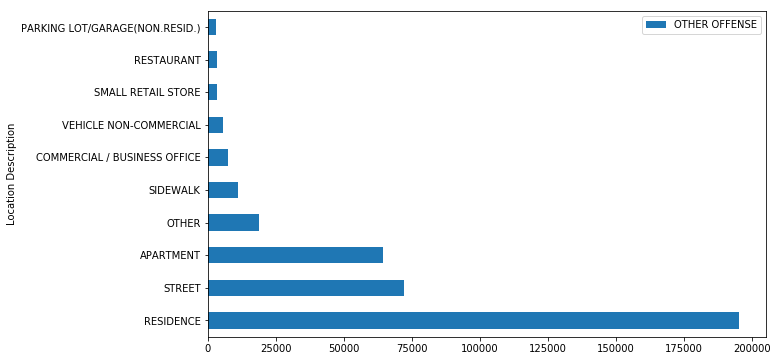

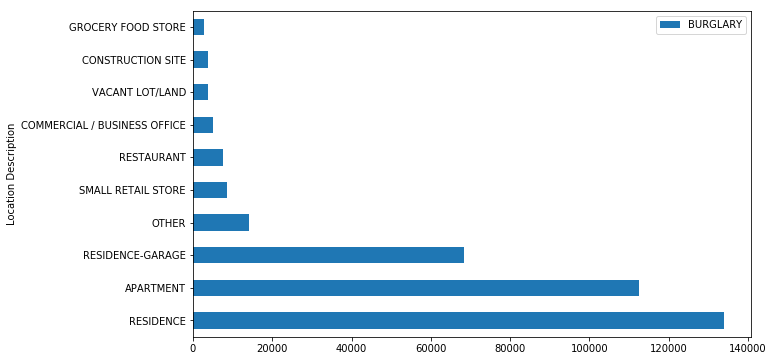

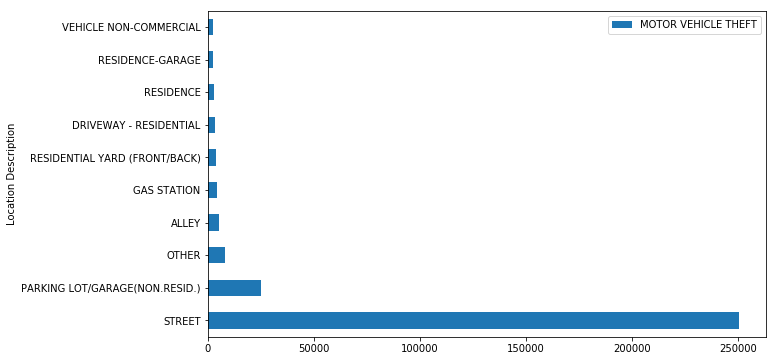

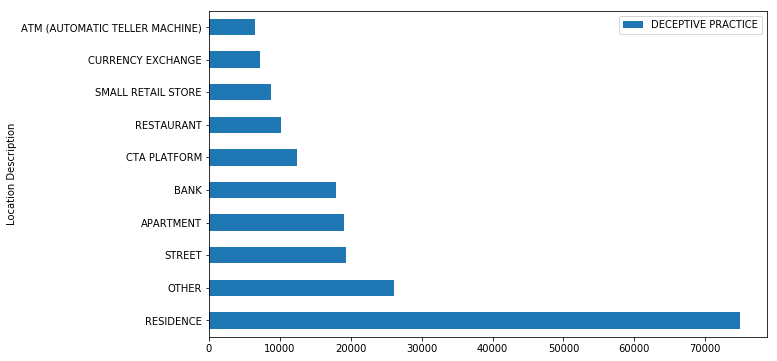

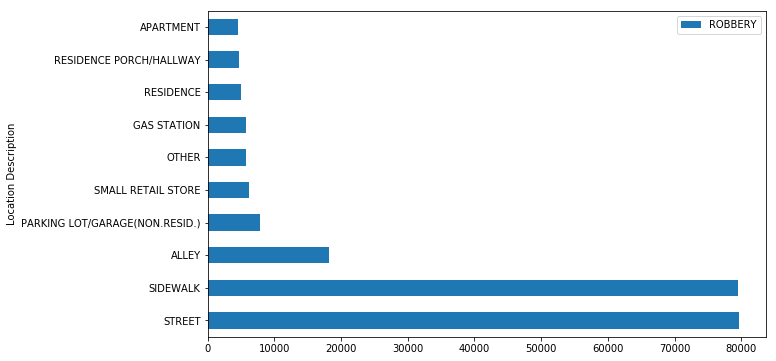

In [64]:
# Graph 4 : Most common Locations based on type of crime for top ten highest occuring crimes

import seaborn as sns
columns =  location_by_type.sum().sort_values(ascending=False).keys()[:10]

def plot_row_pivot(pivot_table,row):
    fig = plt.figure(figsize=(10,6)) 
    ax = fig.gca()
    pivot_table[row].sort_values(ascending= False)[:10].plot(kind='barh').legend()
   

for col in columns:
    plot_row_pivot(location_by_type,col)


    